# 08. Pulling it all Together

For this last lesson, we'll practice going through a full workflow!! We'll answer the question:
### What is the total grocery-store sales volume of each census tract?

<br>
Here's a set of steps, which you can implement in the labeled cells below:

<u> 8.1 Read in and Prep Data</u>
- read in tracts acs joined data
- read our grocery-data CSV into a Pandas DataFrame (it lives at `'notebook_data/other/ca_grocery_stores_2019_wgs84.csv`)
- coerce it to a GeoDataFrame
- define its CRS (EPSG:4326)
- transform it to match the CRS of `tracts_acs_gdf_ac`
- take a peek

<u>8.2 Spatial Join and Dissolve</u>
- join the two datasets in such a way that you can then...
- group by tract and calculate the total grocery-store sales volume
- don't forget to check the dimensions, contents, and any other relevant aspects of your results

<u>8.3 Plot and Review</u>
- plot the tracts, coloring them by total grocery-store sales volume
- plot the grocery stores on top
- bonus points for devising a nice visualization scheme that helps you heuristically check your results!

*We've written out some of the code for you, and you can check your answers by clicking on the toggle solution button*


### Install Packages

In [14]:
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

# get the solution hider
from solution_hider import hide_solution

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

## 8.1 Read in the Prep Data

We first need to prepare our data by loading both our tracts/acs and grocery data, and conduct our usual steps to make there they have the same CRS.

- read in our tracts acs joined data 
- read our grocery-data CSV into a Pandas DataFrame (it lives at `'notebook_data/other/ca_grocery_stores_2019_wgs84.csv`)
- coerce it to a GeoDataFrame
- define its CRS (EPSG:4326)
- transform it to match the CRS of `tracts_acs_gdf_ac`
- take a peek



In [15]:
# read in tracts acs data

# tracts_acs_gdf_ac = gpd.read_file(..)

In [16]:
# read our grocery-data CSV into a Pandas DataFrame

# grocery_pts_df = pd.read_csv(...)

In [17]:
# coerce it to a GeoDataFrame

# grocery_pts_gdf = gpd.GeoDataFrame(grocery_pts_df, 
#                               geometry=gpd.points_from_xy(...,...))

In [18]:
# define its CRS (EPSG:4326)

# grocery_pts_gdf.crs = ...

In [19]:
# transform it to match the CRS of tracts_acs_gdf_ac

# grocery_pts_gdf.to_crs(..., inplace=...)

In [20]:
# take a peek

# print(grocery_pts_gdf.head())

In [32]:
#SOLUTION:

########################
# read in and prep data:
#-----------------------
# read in read in tracts acs data
tracts_acs_gdf_ac = gpd.read_file('outdata/tracts_acs_gdf_ac.json')
# read in the grocery-store data
grocery_pts_df = pd.read_csv('notebook_data/other/ca_grocery_stores_2019_wgs84.csv')
# coerce to a GeoDataFrame
grocery_pts_gdf = gpd.GeoDataFrame(grocery_pts_df, 
                               geometry=gpd.points_from_xy(grocery_pts_df.X, grocery_pts_df.Y))
# define the CRS
grocery_pts_gdf.crs = "epsg:4326"
# transform to our census-tract CRS
grocery_pts_gdf.to_crs(tracts_acs_gdf_ac.crs, inplace=True)
print(grocery_pts_gdf.head())

hide_solution()

          X        Y  OBJECTID     LOCNUM               CONAME  \
0 -121.9200  36.5479   3302270  414460173         BIO-CHEK LLC   
1 -121.9227  36.5530  11234928  729045978  OLIVIER NAPA VALLEY   
2 -121.8099  36.5236  12186144  830486544              SAFEWAY   
3 -121.9105  36.5367     76567  101734812              SAFEWAY   
4 -121.9050  36.5426   1352100  259197937            SAVE MART   

                   STREET    CITY STATE  STATE_NAME    ZIP  ...  EMPNUM  \
0            JUNIPERO AVE  CARMEL    CA  California  93923  ...    17.0   
1  NW SAN CARLOS ON OCEAN  CARMEL    CA  California  93921  ...     6.0   
2          MID VALLEY CTR  CARMEL    CA  California  93923  ...    52.0   
3     THE CROSSROADS BLVD  CARMEL    CA  California  93923  ...    80.0   
4      CARMEL RANCHO BLVD  CARMEL    CA  California  93923  ...    75.0   

   FRNCOD  ISCODE  SQFTCODE       LOC_NAME  STATUS  SCORE     SOURCE REC_TYPE  \
0     NaN     NaN       4.0     StreetName       M  100.0  INFOGROUP   

## 8.2 Spatial Join and Dissolve

Now that we have our data and they're in the same projection, we're going to conduct an *attribute join* to bring together the two datasets. From there we'll be able to actually *aggregate* our data to count the total sales volume.

- join the two datasets in such a way that you can then...
- group by tract and calculate the total grocery-store sales volume
- don't forget to check the dimensions, contents, and any other relevant aspects of your results

In [45]:
# join the two datasets in such a way that you can then...

# tracts_joingrocery = gpd.sjoin(..., ..., how= ...)

In [23]:
# group by tract and calculate the total grocery-store sales volume

# tracts_totsalesvol = tracts_joingrocery[['GEOID','geometry','SALESVOL']].dissolve(by= ...,
#                                                                                   aggfunc=..., as_index=False)

In [24]:
# don't forget to check the dimensions, contents, and any other relevant aspects of your results

# check the dimensions
print('Dimensions of result:', ...)
print('Dimesions of census tracts:', ...)

Dimensions of result: Ellipsis
Dimesions of census tracts: Ellipsis


In [ ]:
# check the result
print(tracts_totsalesvol.head())

In [33]:
# SOLUTION:

############################
# spatial join and dissolve:
#---------------------------
# join the grocery stores onto the tracts
tracts_joingrocery = gpd.sjoin(tracts_acs_gdf_ac, grocery_pts_gdf, how='left')
# dissolve the joined object, summing the SALESVOL column by GEOID
tracts_totsalesvol = tracts_joingrocery[['GEOID','geometry','SALESVOL']].dissolve(by='GEOID',
                                                                                  aggfunc="sum",as_index=False)
# check the dimensions
# print('Dimensions of result:', tracts_totsalesvol.shape)
# print('Dimesions of census tracts:', tracts_acs_gdf_ac.shape)

# check the result
print(tracts_totsalesvol.head())

hide_solution()

         GEOID                                           geometry  SALESVOL
0  06001400100  POLYGON ((-122.24692 37.88544, -122.24197 37.8...       0.0
1  06001400200  POLYGON ((-122.25742 37.84310, -122.25620 37.8...   53470.0
2  06001400300  POLYGON ((-122.26416 37.84000, -122.26186 37.8...       0.0
3  06001400400  POLYGON ((-122.26180 37.84179, -122.26130 37.8...    1103.0
4  06001400500  POLYGON ((-122.26941 37.84811, -122.26891 37.8...       0.0


## 8.3 Plot and Review

With any time of geospatial analysis you do, it's always nice to plot and visualize your results to check your work and start to understand the full story of your analysis.

- Plot the tracts, coloring them by total grocery-store sales volume
- Plot the grocery stores on top
- Bonus points for devising a nice visualization scheme that helps you heuristically check your results!

In [34]:
# create the figure and axes

# fig, ax = plt.subplots(figsize = (20,20)) 
# plot the tracts, coloring by total SALESVOL
# tracts_totsalesvol.plot(ax=ax, column= ..., scheme="quantiles", cmap="autumn", edgecolor="grey",
#                         legend=True, legend_kwds={'title':...})

In [28]:
# subset the stores for only those within our tracts, to keep map within region of interest

# grocery_pts_gdf_ac = grocery_pts_gdf.loc[..., ]

In [30]:
# add the grocery stores, coloring by SALESVOL, for a visual check

# grocery_pts_gdf_ac.plot(ax=ax, column= ... , cmap= ..., linewidth= ..., markersize= ...,
#                      legend=True, legend_kwds={'label': ... , 'orientation': "horizontal"})

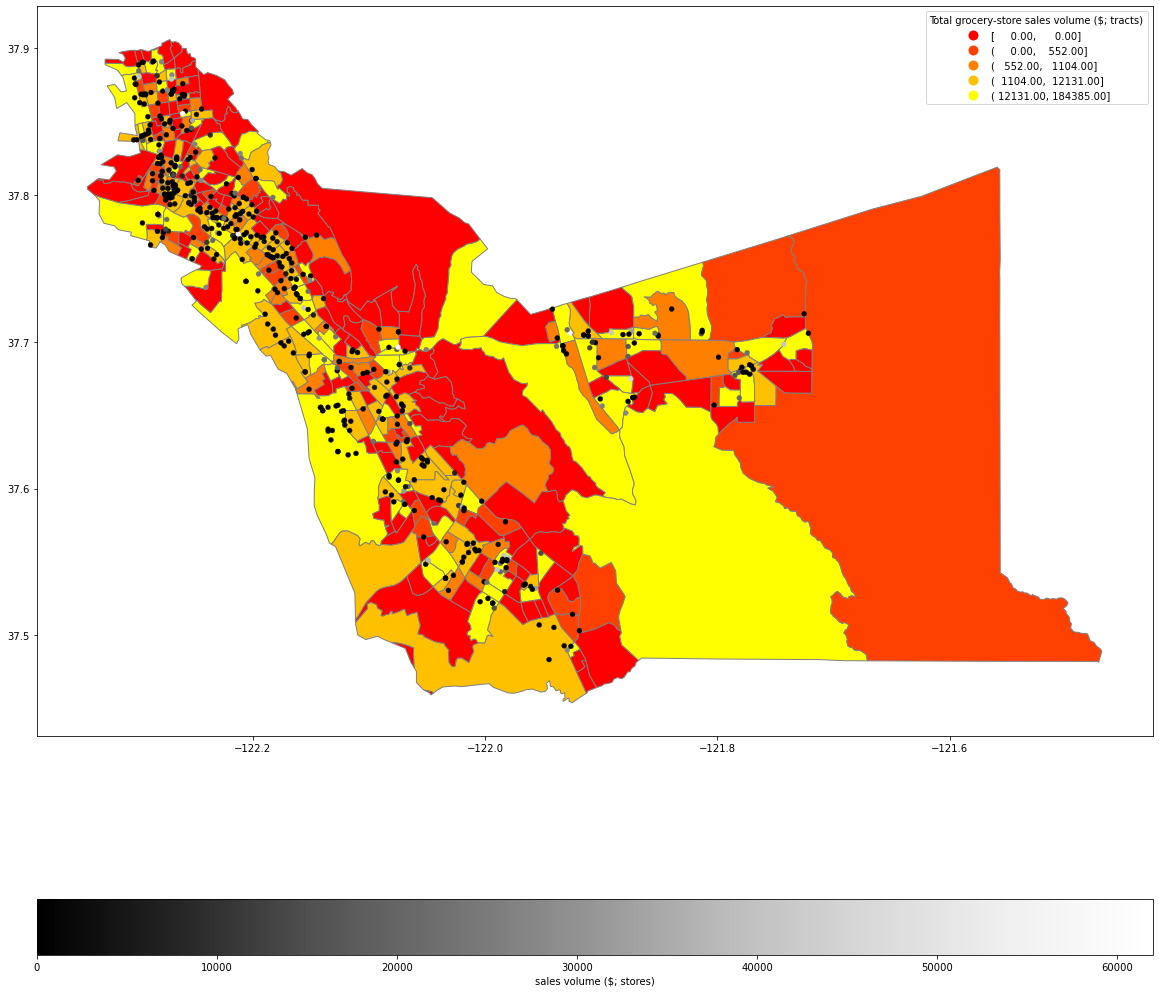

In [31]:
# SOLUTION:

##################
# plot and review:
#-----------------

# create the figure and axes
fig, ax = plt.subplots(figsize = (20,20)) 
# plot the tracts, coloring by total SALESVOL
tracts_totsalesvol.plot(ax=ax,column='SALESVOL', scheme="quantiles", cmap="autumn", edgecolor="grey",
                        legend=True, legend_kwds={'title':'Total grocery-store sales volume ($; tracts)'})
# subset the stores for only those within our tracts, to keep map within region of interest
grocery_pts_gdf_ac = grocery_pts_gdf.loc[grocery_pts_gdf.within(tracts_acs_gdf_ac.unary_union), ]
# add the grocery stores, coloring by SALESVOL, for a visual check
grocery_pts_gdf_ac.plot(ax=ax, column='SALESVOL', cmap='Greys_r', linewidth=0.3, markersize=25,
                     legend=True, legend_kwds={'label': "sales volume ($; stores)", 'orientation': "horizontal"})

hide_solution()

<br>
<br>
<br>
<br>
<br>
<br>

***

# Congrats!! Thanks for Joining Us for Geospatial Fundamentals!!

<img src="https://statmodeling.stat.columbia.edu/wp-content/uploads/2016/07/cat-globe.png">

---
<div style="display:inline-block;vertical-align:middle;">
<a href="https://dlab.berkeley.edu/" target="_blank"><img src ="../assets/images/dlab_logo.png" width="75" align="left">
</a>
</div>

<div style="display:inline-block;vertical-align:middle;">
    <div style="font-size:larger">&nbsp;D-Lab @ University of California - Berkeley</div>
    <div>&nbsp;Team Geo<div>
</div>
        



